In [107]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [97]:
df = pd.read_csv('data.csv',index_col=0)
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


<AxesSubplot:xlabel='gender', ylabel='count'>

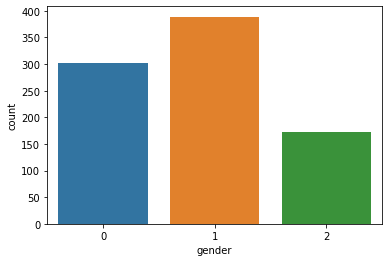

In [68]:
sns.countplot(x=df['gender'])

In [98]:
print(df.gender.value_counts())

1    389
0    302
2    172
Name: gender, dtype: int64


In [102]:
df['gender'] = df['gender'].mask(df['gender'] == 2,1)


In [103]:
df['gender'].value_counts()

1    561
0    302
Name: gender, dtype: int64

In [104]:
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,1,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,1,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [114]:
x = df[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos']]
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,shuffle=True, random_state=42)
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(776, 13)
(87, 13)
(776,)
(87,)


In [115]:
dic = {'k':[], 'weights':[],'precision':[], 'recall':[], 'F1':[], 'roc_auc':[]}
weights = ['distance', 'uniform']
for k in range(3, int(len(X_test)**0.5), 2):
        for j in range(2):
            knn = KNeighborsClassifier(n_neighbors=k, weights=weights[j])
            knn.fit(X_train, y_train)
            y_predict = knn.predict(X_test)
            precision, recall = precision_score(y_predict, y_test), recall_score(y_predict, y_test)
            roc_auc = roc_auc_score(y_test, y_predict)
            F1 = 2 * (precision * recall) / (precision + recall)
            dic['weights'].append(weights[j])
            dic['k'].append(k)
            dic['precision'].append(precision)
            dic['recall'].append(recall)
            dic['F1'].append(F1)
            dic['roc_auc'].append(roc_auc)
    
f = pd.DataFrame(dic)
f


,k,weights,precision,recall,F1,roc_auc
0,3,distance,0.9,0.900000,0.900000,0.943506
1,3,uniform,0.8,0.888889,0.842105,0.893506
2,5,distance,0.9,0.900000,0.900000,0.943506
3,5,uniform,0.8,0.888889,0.842105,0.893506
4,7,distance,0.9,0.900000,0.900000,0.943506
5,7,uniform,0.7,0.875000,0.777778,0.843506
